# Introduction to Neural Networks

## Import packages

In [2]:
!pip install keras

     |████████████████████████████████| 1.7 MB 10.9 MB/s eta 0:00:01


In [4]:
!pip install tensorflow

     |████████████████████████████████| 241.2 MB 706 kB/s eta 0:00:011   |██                              | 15.7 MB 8.0 MB/s eta 0:00:29     |███                             | 23.4 MB 17.1 MB/s eta 0:00:1328.3 MB 17.1 MB/s eta 0:00:13     |████████▊                       | 66.1 MB 7.6 MB/s eta 0:00:24     |█████████▋                      | 72.7 MB 7.6 MB/s eta 0:00:23     |████████████▏                   | 91.6 MB 6.4 MB/s eta 0:00:24     |█████████████▉                  | 104.1 MB 32.2 MB/s eta 0:00:05     |████████████████▉               | 126.7 MB 804 kB/s eta 0:02:23     |████████████████████████████    | 210.7 MB 25.2 MB/s eta 0:00:02     |█████████████████████████████▌  | 222.6 MB 7.9 MB/s eta 0:00:03     |██████████████████████████████  | 226.6 MB 7.9 MB/s eta 0:00:02     |███████████████████████████████ | 233.0 MB 1.4 MB/s eta 0:00:06     |███████████████████████████████▌| 237.6 MB 706 kB/s eta 0:00:06     |████████████████████████████████| 241.2 MB 6.6 kB/s 
     |████████████

In [2]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2022-10-14 06:45:56.853234: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


ImportError: cannot import name 'load_img' from 'keras.preprocessing.image' (/Users/chrispeterson/opt/anaconda3/lib/python3.9/site-packages/keras/preprocessing/image.py)

## Load the data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)

(60000, 28, 28)


In [5]:
print(y_train.shape)

(60000,)


In [6]:
print(X_test.shape)

(10000, 28, 28)


In [7]:
print(y_test.shape)

(10000,)


## Understanding the image data format

In [8]:
X_train[0].shape

(28, 28)

In [9]:
import matplotlib.pyplot as plt

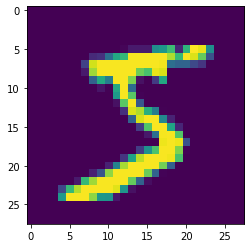

In [10]:
plt.imshow(X_train[0])

In [11]:
y_train[0]

5

## Preprocessing the image data

In [12]:
image_height, image_width=28,28

In [13]:
X_train = X_train.reshape(60000, image_height * image_width)
X_test = X_test.reshape(10000, image_height * image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [14]:
print(X_train[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [15]:
X_train /= 255.0
X_test /= 255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [16]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [17]:
from keras.utils.np_utils import to_categorical

In [18]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [21]:
from keras.models import Sequential
from keras.layers import Dense

In [22]:
model = Sequential()

2022-10-14 06:58:20.623651: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation= 'relu'))
model.add(Dense(10, activation='softmax'))

## Build a model

## Compile the model

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [27]:
784*512+512

401920

In [28]:
512*512+512

262656

In [29]:
512*10+10

5130

## Train the model

In [30]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1809 - accuracy: 0.9445 - val_loss: 0.1169 - val_accuracy: 0.9640
Epoch 2/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0799 - accuracy: 0.9746 - val_loss: 0.0760 - val_accuracy: 0.9758
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0569 - accuracy: 0.9820 - val_loss: 0.0886 - val_accuracy: 0.9758
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0436 - accuracy: 0.9863 - val_loss: 0.1253 - val_accuracy: 0.9647
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.0810 - val_accuracy: 0.9774
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0314 - accuracy: 0.9900 - val_loss: 0.0868 - val_accuracy: 0.9772
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0235 - accuracy: 0.9925 - val_loss: 0.0809 - val_ac

## What is the accuracy of the model?

### Plot the accuracy of the training model

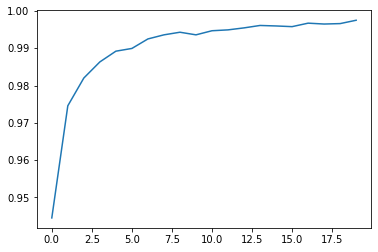

In [35]:
plt.plot(history.history['accuracy'])


### Plot the accuracy of training and validation set

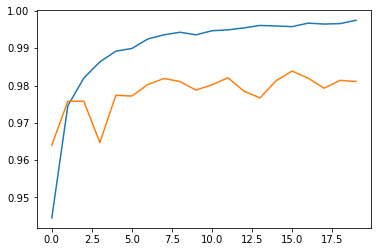

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### Accuracy of training and validation with loss

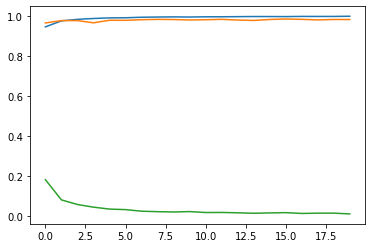

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

In [38]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1603 - accuracy: 0.9811


In [39]:
score

[0.16031959652900696, 0.9811000227928162]

## Run a prediction

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons
- What results do you get when trying to use another activation function?

# Convolution Neural Network

## Import the libraries

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Pre-processing

In [ ]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

batch_size = 128
num_classes = 10
epochs = 3

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Use the model

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

In [ ]:
history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_train,y_train))

Recall that when using neural networks we got good accuracy.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

Comparing this to using CNNs - the performance is far superior.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])

## Not related just testing out files

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data/olympics.csv',skiprows=4)
df.head()